In [18]:
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot  as plt
from sklearn.datasets import load_digits
import seaborn as sns
import numpy as np
digits = load_digits()
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df.head(25)
df['target'] = digits.target
df.isnull().sum()
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


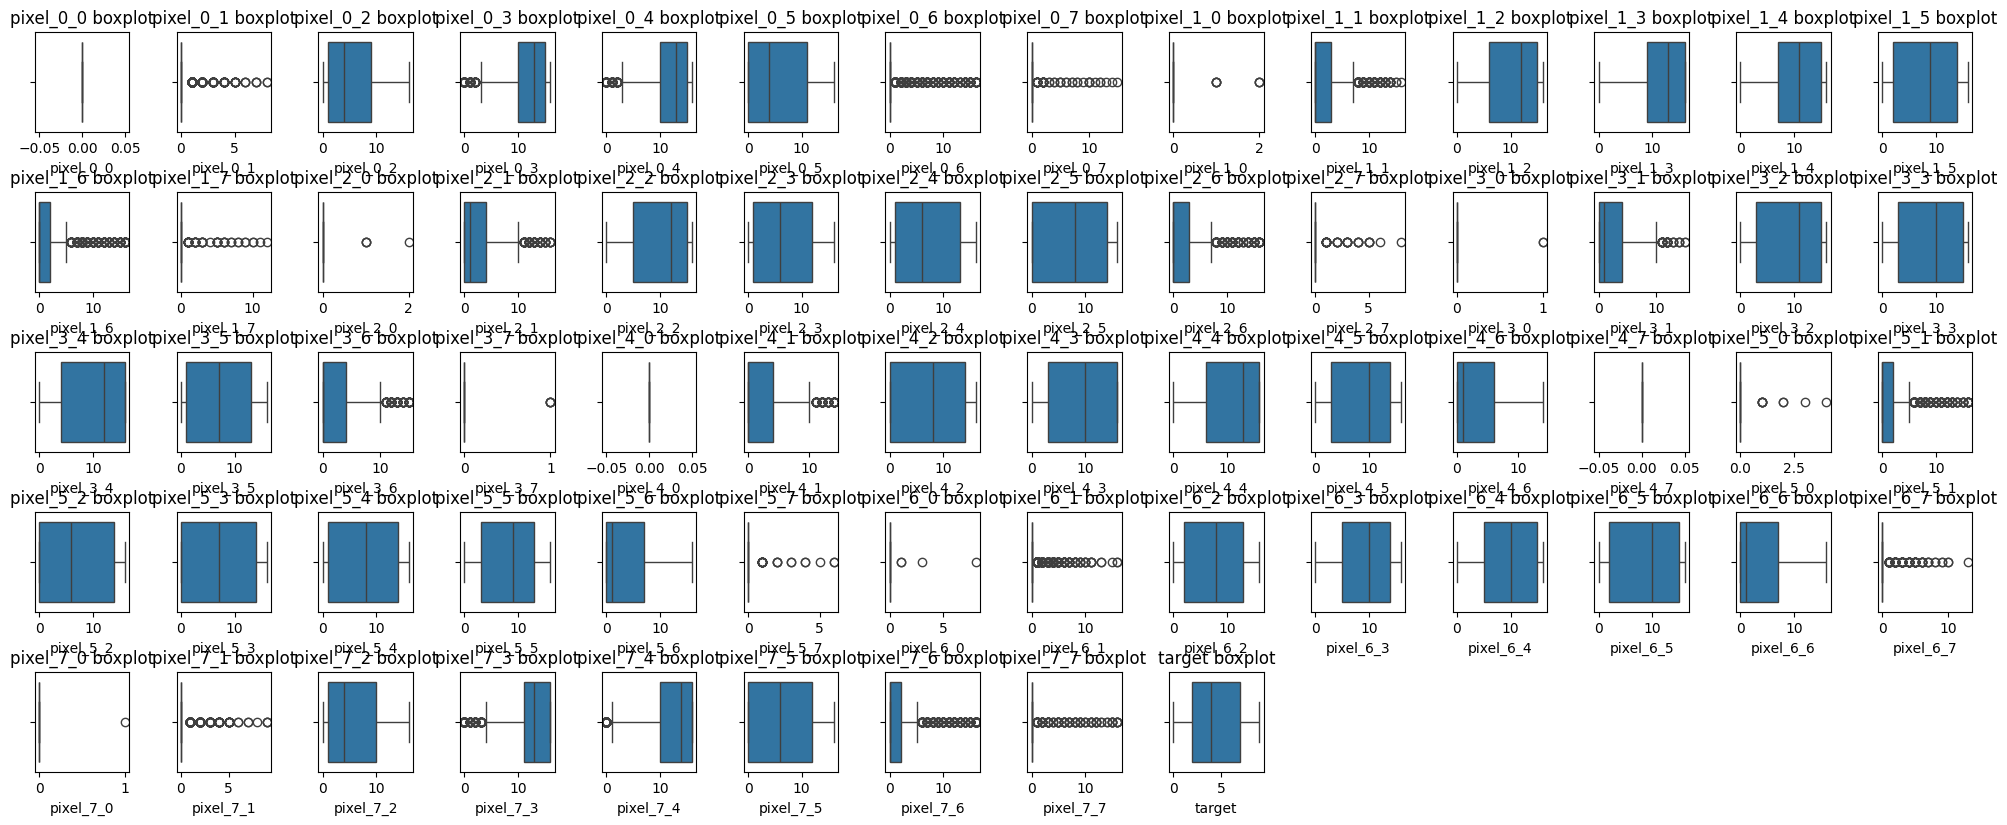

In [19]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(25, 20))
for i, col in enumerate(num_cols):
    plt.subplot(10, 14, i+1)
    sns.boxplot(df[col], orient="h") 
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=.6, wspace=.5)
plt.show()

In [20]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_9796\1797019663.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_9796\1797019663.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

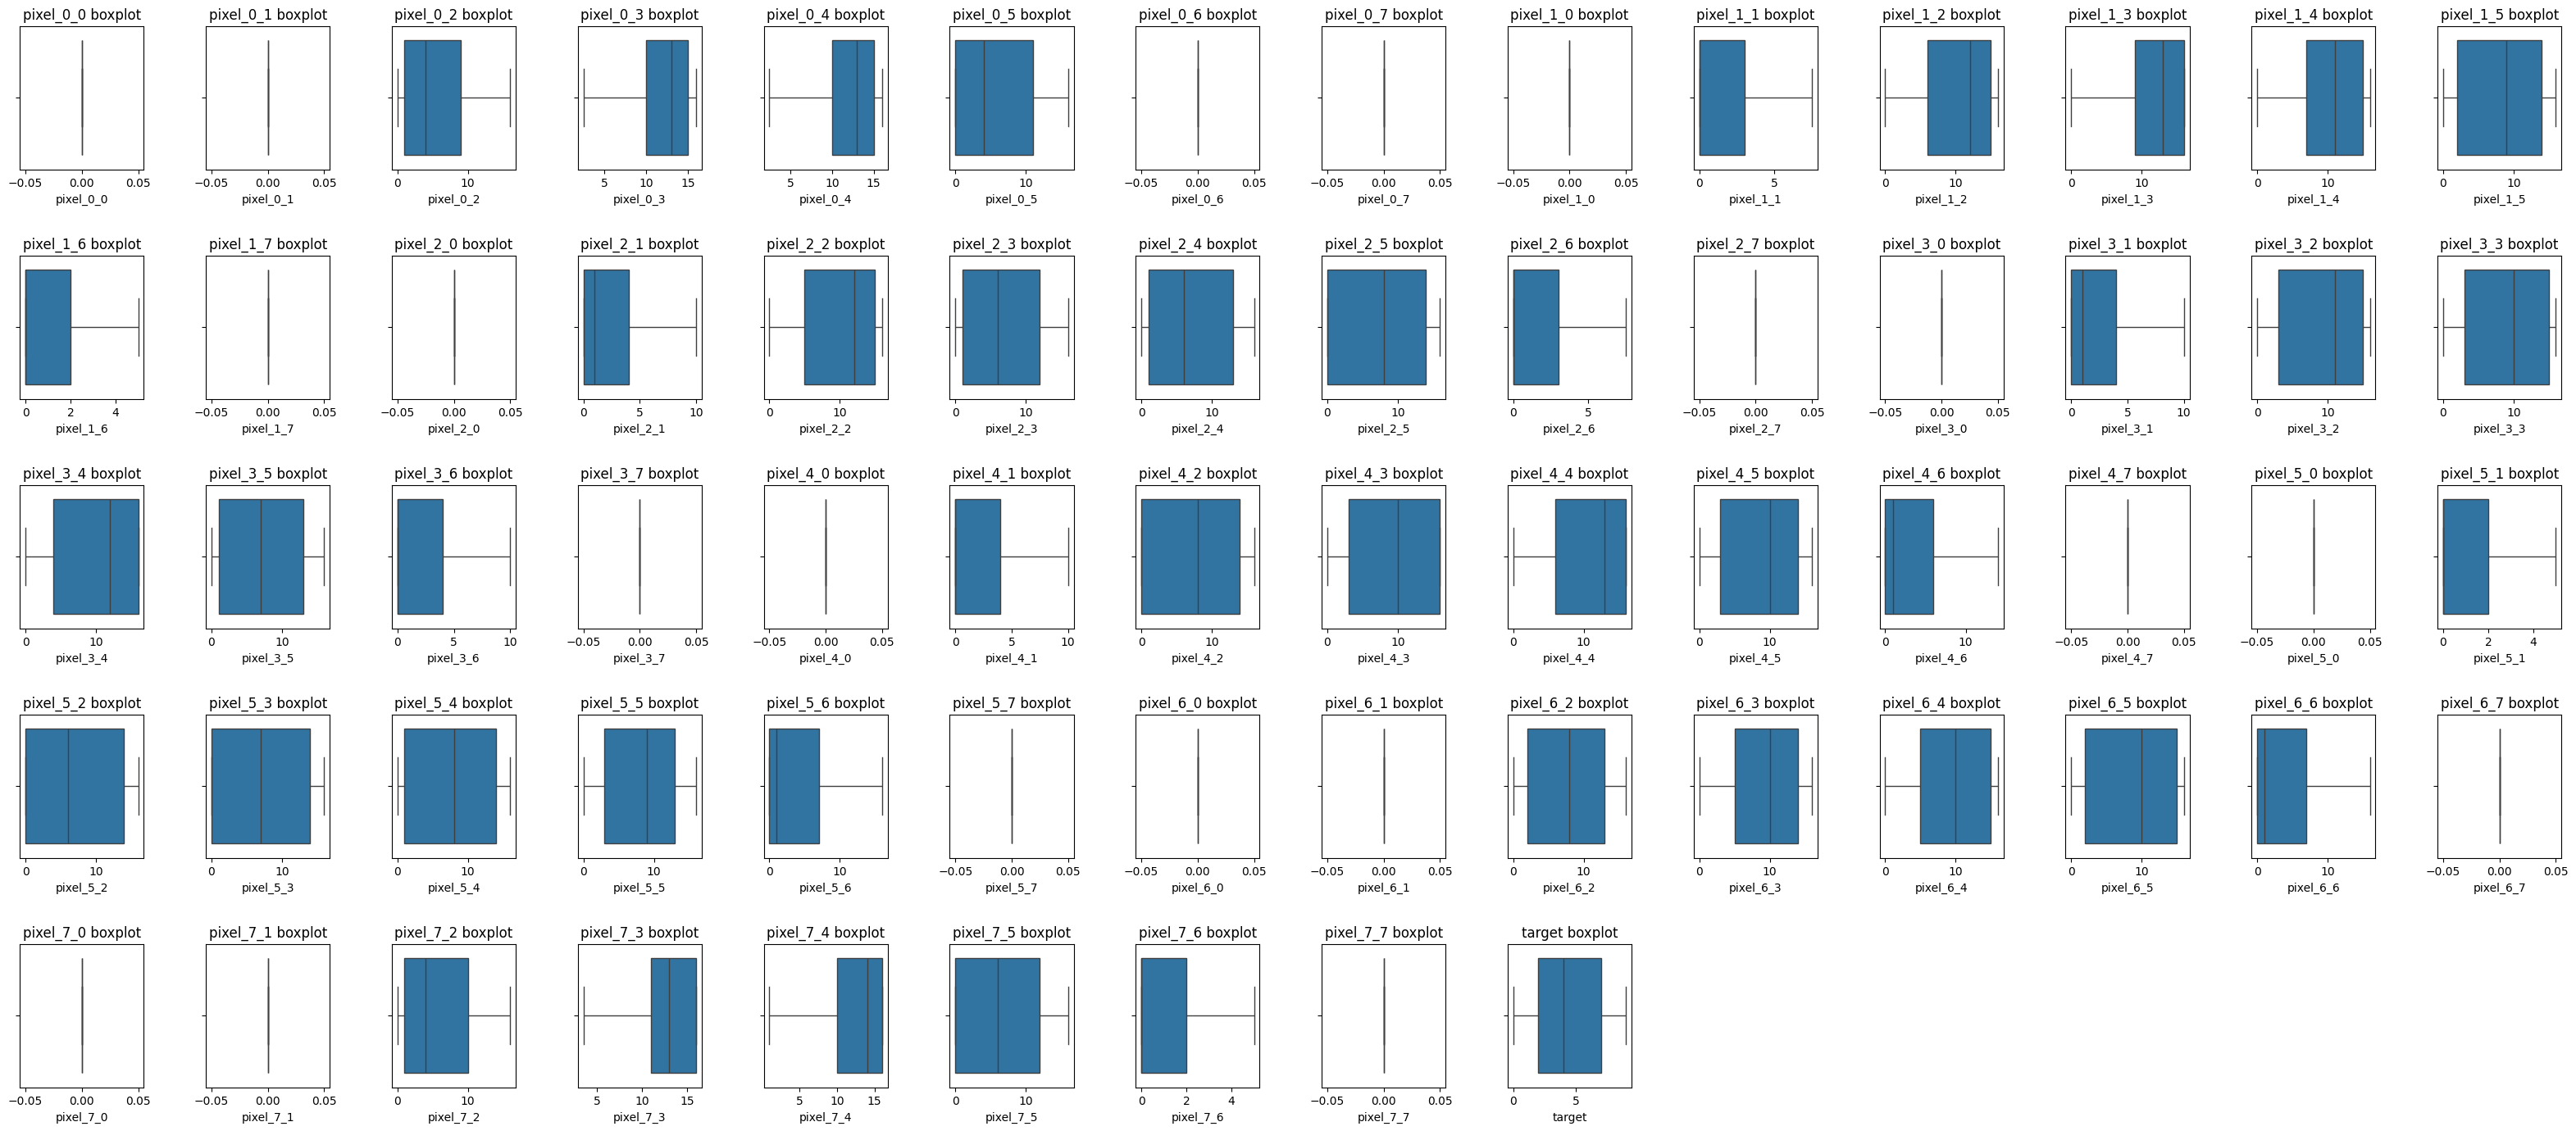

In [21]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(40, 35))
for i, col in enumerate(num_cols):
    plt.subplot(10, 14, i+1)
    sns.boxplot(df[col], orient="h") 
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=.6, wspace=.5)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
x=df.drop(['target'],axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

SVC()

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(y_test, y_pred))

0.9907407407407407


In [32]:
from sklearn.model_selection import GridSearchCV
param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search=GridSearchCV(estimator=SVC(),
                        param_grid=param,
                        scoring='accuracy',
                        cv=10
                        )
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [33]:
best_params

{'C': 10, 'kernel': 'rbf'}

In [34]:
best_score

np.float64(0.9872825396825398)